In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

class InFile(object):
    def __init__(self, infile):
        self.infile = open(infile)

    def __next__(self):
        return self.next()

    def __iter__(self):
        return self

    def read(self, *args, **kwargs):
        return self.__next__()

    def next(self):
        try:
            line: str = self.infile.readline()
            line = re.sub(r'","',r',',line) # do some fixing
            return line
        except:
            self.infile.close()
            raise StopIteration
        

df = pd.read_csv(InFile('Taylor.csv'))
df.head()

C:\Users\Szymon\AppData\Local\Temp\ipykernel_5432\1142402393.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,danceability,energy,valence,speechiness,popularity,duration diff [sekundy],Duration Diff2,liveness,explicit
0,0.602,0.605,0.316,0.0327,42,119,00:01:59,0.3670,0
1,0.733,0.733,0.701,0.0670,72,21,00:00:21,0.1680,0
2,0.546,0.273,0.271,0.0397,68,57,00:00:57,0.0899,0
3,0.519,0.527,0.267,0.0447,73,28,00:00:28,0.3850,0
4,0.567,0.789,0.438,0.0317,78,3,00:00:03,0.1310,0


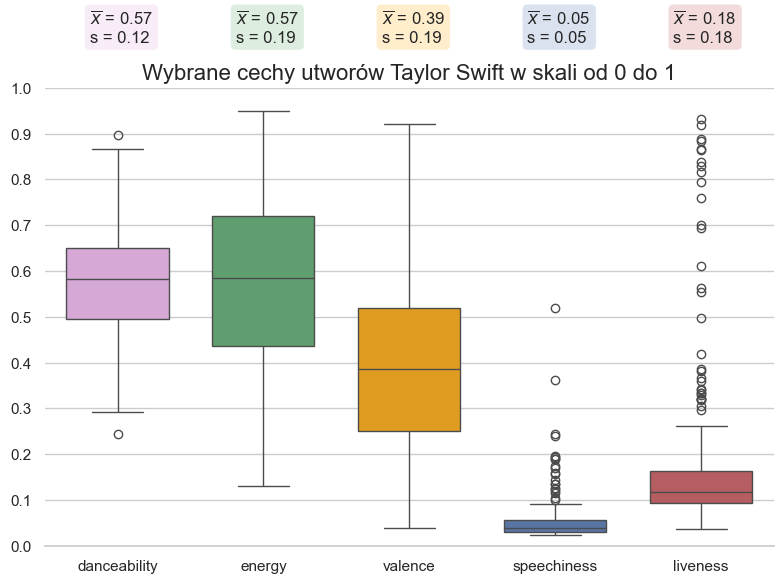

In [8]:
df = df[['danceability', 'energy', 'valence', 'speechiness', 'liveness']]
sns.set(style='whitegrid')

palette = ['plum', 'g', 'orange', 'b', 'r']
fig, ax = plt.subplots(figsize=(8,6))
g = sns.boxplot(data=df, width=0.7, palette=palette)

#tekst
plt.title('Wybrane cechy utworów Taylor Swift w skali od 0 do 1', fontsize=16)
xvalues = ['danceability', 'energy', 'valence', 'speechiness', 'liveness']

plt.xticks(np.arange(5), xvalues)
plt.yticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
plt.ylim([0,1])

#ramki
sns.despine(top=True, right=True, left=True, bottom=False)

#Średnia i odchylenie standardowe dla każdej cechy
#danceability
mean = round(df['danceability'].mean(), 2)
sd = round(df['danceability'].std(), 2)
textstr = "$\overline {x}$" + f" = {mean} \ns = {sd}"
props = dict(boxstyle='round', facecolor='plum', alpha=0.2)
g.text(-0.19, 1.1, textstr, fontsize=12, bbox=props)

#energy
mean = round(df['energy'].mean(), 2)
sd = round(df['energy'].std(), 2)
textstr = "$\overline {x}$" + f" = {mean} \ns = {sd}"
props = dict(boxstyle='round', facecolor='g', alpha=0.2)
g.text(.81, 1.1, textstr, fontsize=12, bbox=props)


#valence
mean = round(df['valence'].mean(), 2)
sd = round(df['valence'].std(), 2)
textstr = "$\overline {x}$" + f" = {mean} \ns = {sd}"
props = dict(boxstyle='round', facecolor='orange', alpha=0.2)
g.text(1.81, 1.1, textstr, fontsize=12, bbox=props)

#speechiness
mean = round(df['speechiness'].mean(), 2)
sd = round(df['speechiness'].std(), 2)
textstr = "$\overline {x}$" + f" = {mean} \ns = {sd}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(2.81, 1.1, textstr, fontsize=12, bbox=props)

#liveness
mean = round(df['liveness'].mean(), 2)
sd = round(df['liveness'].std(), 2)
textstr = "$\overline {x}$" + f" = {mean} \ns = {sd}"
props = dict(boxstyle='round', facecolor='r', alpha=0.2)
g.text(3.81, 1.1, textstr, fontsize=12, bbox=props)


plt.tight_layout()
plt.show()




In [11]:
fig = g.get_figure()
fig.savefig('images/boxplot.png')

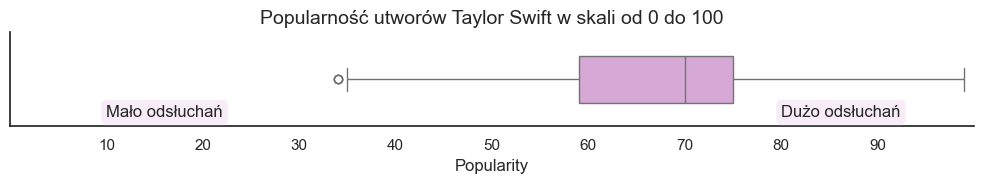

In [3]:
df = pd.read_csv(InFile('Taylor.csv'))
sns.set(style='white')

fig, ax = plt.subplots(figsize=(10,2))

g = sns.boxplot(df['popularity'], color='plum', width=.5, orient='h')

plt.title('Popularność utworów Taylor Swift w skali od 0 do 100', fontsize=14)
plt.xlabel('Popularity')

sns.despine()

plt.xlim([0,100])
plt.xticks(np.arange(10, 100, 10))

props = dict(boxstyle='round', facecolor='plum', alpha=0.2)
ax.text(10, 0.4, "Mało odsłuchań", fontsize=12, bbox=props)
ax.text(80, 0.4, "Dużo odsłuchań", fontsize=12, bbox=props)

plt.tight_layout()
plt.show()

In [4]:
fig = g.get_figure()
fig.savefig('images/boxplot_populari.png')

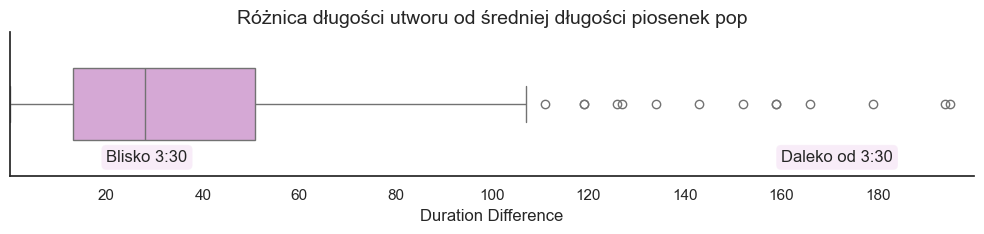

In [70]:
df = pd.read_csv(InFile('Taylor.csv'))
sns.set(style='white')

fig, ax = plt.subplots(figsize=(10,2.5))

g = sns.boxplot(df['duration diff [sekundy]'], color='plum', width=.5, orient='h')

plt.title('Różnica długości utworu od średniej długości piosenek pop', fontsize=14)
plt.xlabel('Duration Difference')

sns.despine()

plt.xlim([0,200])
plt.xticks(np.arange(20, 200, 20))

props = dict(boxstyle='round', facecolor='plum', alpha=0.2)
ax.text(20, 0.4, "Blisko 3:30", fontsize=12, bbox=props)
ax.text(160, 0.4, "Daleko od 3:30", fontsize=12, bbox=props)

plt.tight_layout()
plt.show()

In [71]:
fig = g.get_figure()
fig.savefig('boxplot_duration.png')

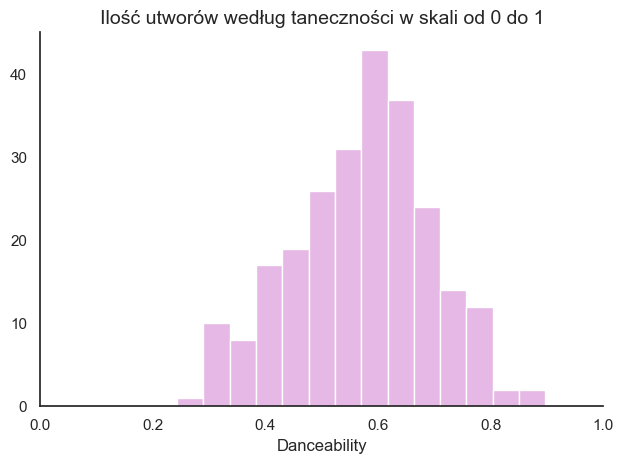

In [20]:
df = pd.read_csv(InFile('Taylor.csv'))
sns.set(style='white')
g = sns.histplot(df['danceability'], color='plum')

plt.title('Ilość utworów według taneczności w skali od 0 do 1', fontsize=14)
plt.xlabel('Danceability')
plt.ylabel('')
sns.despine()

plt.xlim([0,1])

plt.tight_layout()
plt.show()
fig = g.get_figure()
fig.savefig('hist_danceability.png')

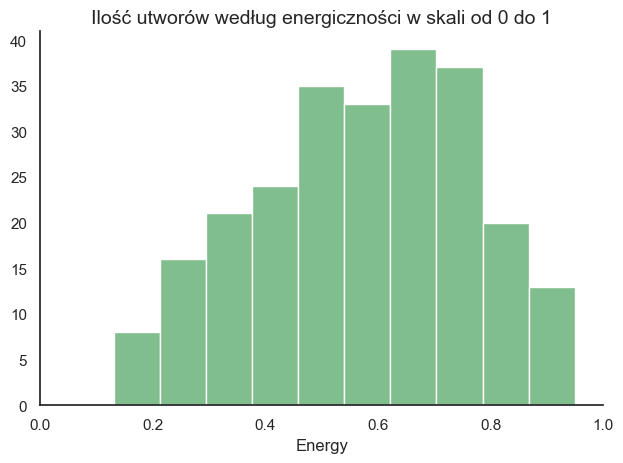

In [21]:
df = pd.read_csv(InFile('Taylor.csv'))
sns.set(style='white')
g = sns.histplot(df['energy'], color='g')

plt.title('Ilość utworów według energiczności w skali od 0 do 1', fontsize=14)
plt.xlabel('Energy')
plt.ylabel('')
sns.despine()

plt.xlim([0,1])

plt.tight_layout()
plt.show()
fig = g.get_figure()
fig.savefig('hist_energy.png')

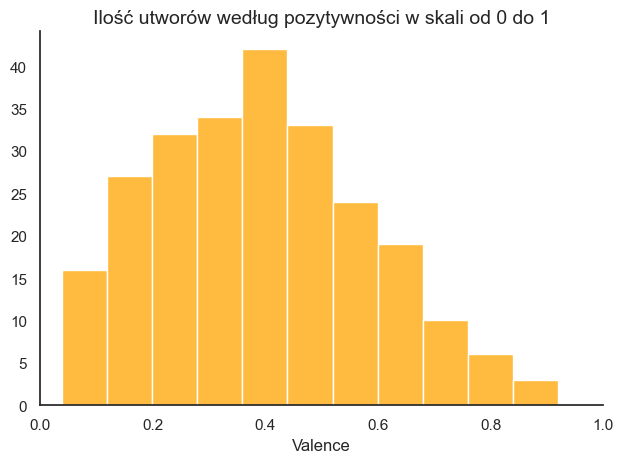

In [22]:
df = pd.read_csv(InFile('Taylor.csv'))
sns.set(style='white')
g = sns.histplot(df['valence'], color='orange')

plt.title('Ilość utworów według pozytywności w skali od 0 do 1', fontsize=14)
plt.xlabel('Valence')
plt.ylabel('')
sns.despine()

plt.xlim([0,1])

plt.tight_layout()
plt.show()
fig = g.get_figure()
fig.savefig('hist_valence.png')

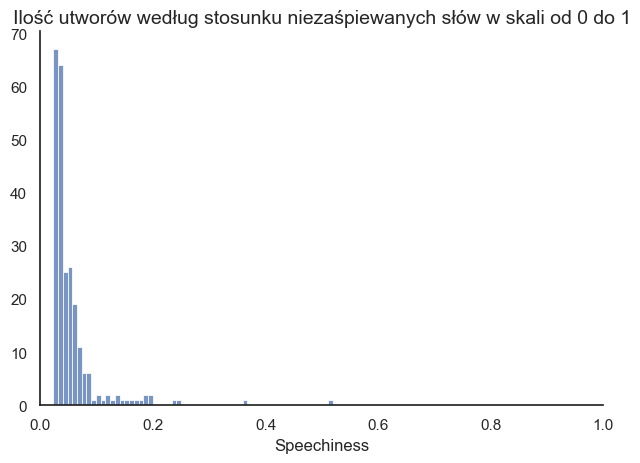

In [23]:
df = pd.read_csv(InFile('Taylor.csv'))
sns.set(style='white')
g = sns.histplot(df['speechiness'], color='b')

plt.title('Ilość utworów według stosunku niezaśpiewanych słów w skali od 0 do 1', fontsize=14)
plt.xlabel('Speechiness')
plt.ylabel('')
sns.despine()

plt.xlim([0,1])

plt.tight_layout()
plt.show()
fig = g.get_figure()
fig.savefig('hist_speechiness.png')

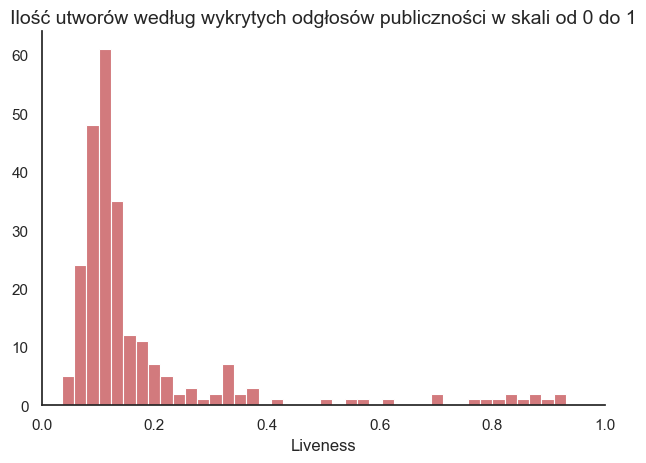

In [24]:
df = pd.read_csv(InFile('Taylor.csv'))
sns.set(style='white')
g = sns.histplot(df['liveness'], color='r')

plt.title('Ilość utworów według wykrytych odgłosów publiczności w skali od 0 do 1', fontsize=14)
plt.xlabel('Liveness')
plt.ylabel('')
sns.despine()

plt.xlim([0,1])

plt.tight_layout()
plt.show()
fig = g.get_figure()
fig.savefig('hist_liveness.png')

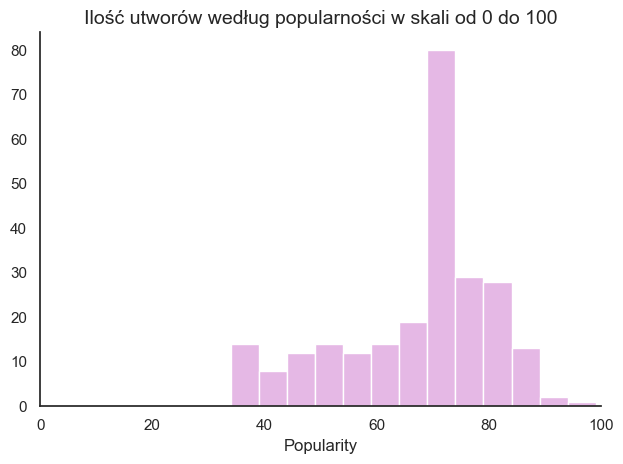

In [25]:
df = pd.read_csv(InFile('Taylor.csv'))
sns.set(style='white')
g = sns.histplot(df['popularity'], color='plum')

plt.title('Ilość utworów według popularności w skali od 0 do 100', fontsize=14)
plt.xlabel('Popularity')
plt.ylabel('')
sns.despine()

plt.xlim([0,100])

plt.tight_layout()
plt.show()
fig = g.get_figure()
fig.savefig('hist_popularity.png')

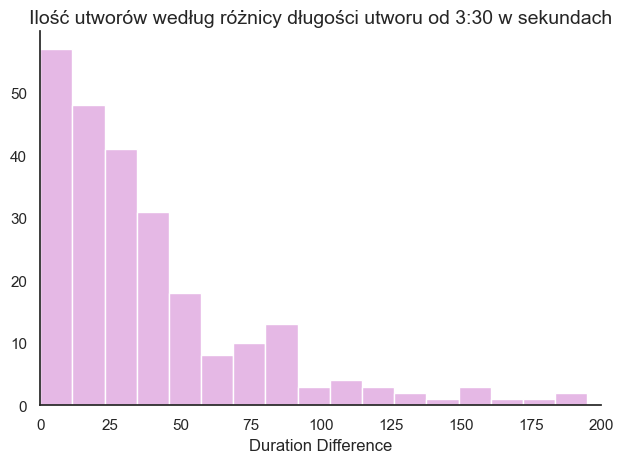

In [26]:
df = pd.read_csv(InFile('Taylor.csv'))
sns.set(style='white')
g = sns.histplot(df['duration diff [sekundy]'], color='plum')

plt.title('Ilość utworów według różnicy długości utworu od 3:30 w sekundach', fontsize=14)
plt.xlabel('Duration Difference')
plt.ylabel('')
sns.despine()

plt.xlim([0,200])

plt.tight_layout()
plt.show()
fig = g.get_figure()
fig.savefig('hist_duration.png')

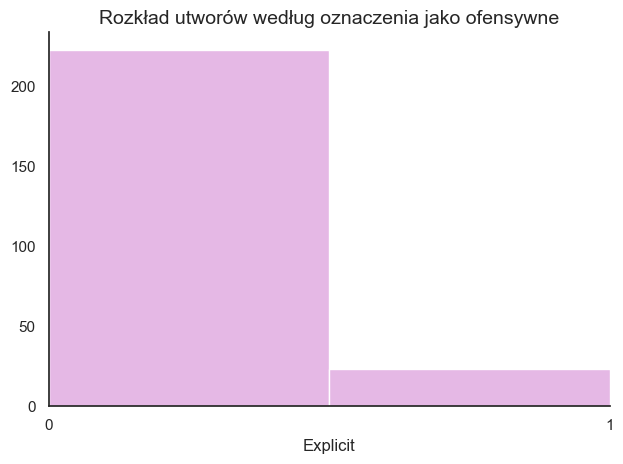

In [31]:
df = pd.read_csv(InFile('Taylor.csv'))
sns.set(style='white')
g = sns.histplot(df['explicit'], color='plum', bins=2)

plt.title('Rozkład utworów według oznaczenia jako ofensywne', fontsize=14)
plt.xlabel('Explicit')
plt.ylabel('')
sns.despine()

plt.xticks([0,1])
plt.xlim([0,1])

plt.tight_layout()
plt.show()
fig = g.get_figure()
fig.savefig('hist_explicit.png')